# Proyek Machine Learning Terapan 1 : Diabetes Prediction

oleh : M. Zidan Richal Fajril Falah

## 1. Data Understanding

Pada tahap ini, kita akan memahami data yang akan digunakan dalam proyek ini. Proses ini meliputi pengumpulan data, pemahaman struktur data, dan eksplorasi awal untuk mendapatkan **insight** penting.

### 1.1 Data Loading

Tahap ini berfokus pada pemuatan dataset ke dalam lingkungan kerja. Kita juga akan memastikan library yang dibutuhkan sudah terimport dengan benar.

#### 1.1.1 Import Modul dan Library

Pada tahap ini, kita akan mengimpor semua library Python yang dibutuhkan untuk analisis data, visualisasi, dan pemodelan machine learning.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import kagglehub
import os
import joblib
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import KNNImputer

warnings.filterwarnings('ignore')

/Users/richalfajril/diabetes-prediction/env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### 1.1.2 Download Dataset

Dataset yang digunakan dalam proyek ini adalah dataset Pima Indians Diabetes yang tersedia di Kaggle. Dataset ini akan diunduh menggunakan library kagglehub. Proses ini akan otomatis mengunduh dataset ke direktori yang sesuai.

In [3]:
# Download dataset
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")
file_path = os.path.join(path, "diabetes.csv")
print("Path to dataset files:", path)

Path to dataset files: /Users/richalfajril/.cache/kagglehub/datasets/uciml/pima-indians-diabetes-database/versions/1


#### 1.1.3 Load Dataset

Dataset yang telah diunduh kemudian akan dibaca menggunakan library pandas dan disimpan dalam dataframe df. Tampilan awal dataframe akan ditampilkan untuk memastikan data telah termuat dengan benar.

In [4]:
# Load Dataset
df = pd.read_csv(file_path)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### 1.2 Exploratory Data Analysis - Deskripsi Variabel

Pada tahap ini, kita akan melakukan eksplorasi data untuk memahami karakteristik dan distribusi dari setiap fitur dalam dataset.


#### 1.2.1 Deskripsi dan Info Variabel

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Dataset ini berisi informasi tentang karakteristik kesehatan pasien yang digunakan untuk memprediksi kemungkinan diabetes. Dataset ini terdiri dari 768 sampel (baris) dan 9 fitur (kolom). Berikut adalah deskripsi untuk setiap kolom:

- **Pregnancies**: Jumlah kehamilan yang pernah dialami oleh pasien. Ini adalah fitur numerik dengan tipe data integer.
- **Glucose**: Konsentrasi glukosa plasma dalam darah setelah 2 jam dalam tes toleransi glukosa oral. Ini adalah fitur numerik dengan tipe data integer.
- **BloodPressure**: Tekanan darah diastolik (mm Hg). Ini adalah fitur numerik dengan tipe data integer.
- **SkinThickness**: Ketebalan lipatan kulit trisep (mm). Ini adalah fitur numerik dengan tipe data integer.
- **Insulin**: Kadar insulin serum setelah 2 jam dalam tes toleransi glukosa oral (mu U/ml). Ini adalah fitur numerik dengan tipe data integer.
- **BMI**: Indeks Massa Tubuh (Body Mass Index) dihitung dengan berat dalam kg / (tinggi dalam meter)^2. Ini adalah fitur numerik dengan tipe data float.
- **DiabetesPedigreeFunction**: Fungsi riwayat keluarga diabetes, yaitu suatu nilai yang menunjukkan kemungkinan diabetes berdasarkan riwayat keluarga. Ini adalah fitur numerik dengan tipe data float.
- **Age**: Usia pasien (tahun). Ini adalah fitur numerik dengan tipe data integer.
- **Outcome**: Variabel target yang menunjukkan apakah pasien didiagnosis diabetes (1) atau tidak (0). Ini adalah fitur kategorikal (biner) dengan tipe data integer.

#### 1.2.2 Deskripsi Statistik

Deskripsi statistik dari setiap fitur akan ditampilkan menggunakan df.describe(). Ini termasuk nilai mean, standar deviasi, minimum, maksimum, dan kuartil. Statistik ini memberikan pemahaman awal tentang distribusi data dan potensi adanya outlier.

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 1.3 Exploratory Data Analysis - Menangani Missing Values, Outliers, dan Inbalance Data

#### 1.3.1 Menangani Missing Values

Kita akan memeriksa jumlah missing values pada setiap kolom menggunakan df.isnull().sum() dan melihat data yang memiliki nilai nol di kolom kritis seperti 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', dan 'BMI'. Nilai nol ini akan dianggap sebagai missing values dan diimputasi menggunakan KNN imputer.

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
# Cek Kolom dengan niali 0
for col in df.columns:
  print(f"Number of zeros in column '{col}': {df[df[col] == 0][col].count()}")


Number of zeros in column 'Pregnancies': 111
Number of zeros in column 'Glucose': 5
Number of zeros in column 'BloodPressure': 35
Number of zeros in column 'SkinThickness': 227
Number of zeros in column 'Insulin': 374
Number of zeros in column 'BMI': 11
Number of zeros in column 'DiabetesPedigreeFunction': 0
Number of zeros in column 'Age': 0
Number of zeros in column 'Outcome': 500


In [10]:
# Imputasi Nilai 0 dengan KNN
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_impute] = df[columns_to_impute].replace(0, np.nan)

# Pisahkan data menjadi set training dan testing sebelum imputasi
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definisikan pilihan jumlah tetangga (n_neighbors) untuk KNN
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}

# Fungsi untuk melatih model dan melakukan imputasi KNN
def train_and_evaluate(X_train, X_test, y_train, y_test, n_neighbors):
    imputer = KNNImputer(n_neighbors=n_neighbors)
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_imputed, y_train)
    y_pred = model.predict(X_test_imputed)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Cari nilai n_neighbors terbaik berdasarkan akurasi
best_n_neighbors = None
best_accuracy = 0
for n_neighbors in param_grid['n_neighbors']:
    accuracy = train_and_evaluate(X_train, X_test, y_train, y_test, n_neighbors)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_neighbors = n_neighbors

print(f"Best n_neighbors: {best_n_neighbors}")
print(f"Best accuracy: {best_accuracy}")

Best n_neighbors: 7
Best accuracy: 0.7662337662337663


In [11]:
# Imputasi akhir dengan n terbaik pada seluruh data
imputer = KNNImputer(n_neighbors=best_n_neighbors)
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000  185.285714  33.6   
1            1     85.0           66.0      29.000000   57.714286  26.6   
2            8    183.0           64.0      28.142857  310.857143  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


#### 1.3.2 Menangani Outliers

Identifikasi outliers akan dilakukan menggunakan visualisasi boxplot. Outliers akan ditangani dengan metode IQR (Interquartile Range).

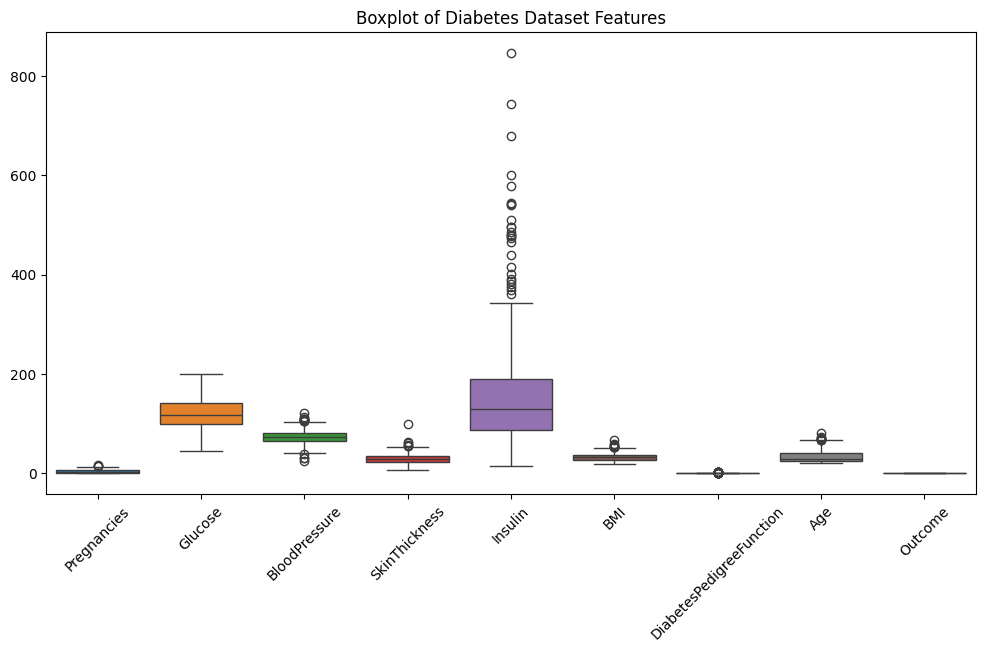

In [12]:
# Menampilkan Bloxplot untuk Melihat Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Diabetes Dataset Features')
plt.xticks(rotation=45)
plt.show()

In [13]:
# Menghapus Outliers
def remove_outliers_iqr(df, columns, multiplier=1):
    df_no_outliers = df.copy()
    for col in columns:
        Q1 = df_no_outliers[col].quantile(0.25)
        Q3 = df_no_outliers[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]
    print(f"Jumlah data sebelum outliers dihapus: {len(df)}, setelah outliers dihapus: {len(df_no_outliers)}")
    return df_no_outliers

columns_to_check = X.columns
df_no_outliers = remove_outliers_iqr(df, columns_to_check)

Jumlah data sebelum outliers dihapus: 768, setelah outliers dihapus: 509


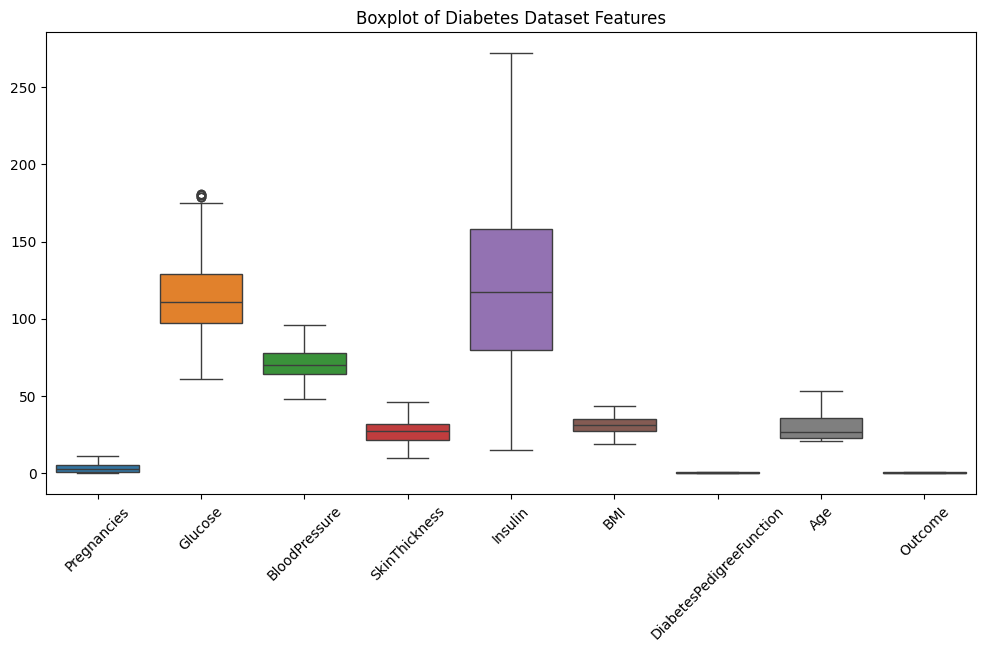

In [14]:
# Menampilkan Bloxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers)
plt.title('Boxplot of Diabetes Dataset Features')
plt.xticks(rotation=45)
plt.show()

#### 1.3.3 Oversampling Data

SMOTE (Synthetic Minority Over-sampling Technique) akan digunakan untuk menyeimbangkan kelas Outcome.

In [15]:
# Oversampling Data
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(df_no_outliers.drop('Outcome', axis=1), df_no_outliers['Outcome'])
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['Outcome'] = y_resampled
print("Data balancing completed.")

Data balancing completed.


1 = 371
0 = 371


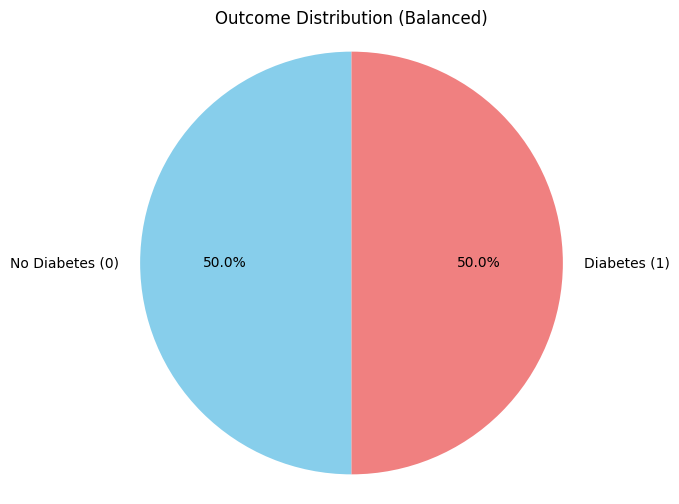

In [16]:
# Visualisasi Distribusi Label yang seimbang
outcome_counts = df_balanced['Outcome'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(outcome_counts, labels=['No Diabetes (0)', 'Diabetes (1)'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Outcome Distribution (Balanced)')
plt.axis('equal')
for i, count in enumerate(outcome_counts):
    label = f"{outcome_counts.index[i]} = {count}"
    x = outcome_counts.index[i]
    print(f"{label}")

plt.show()

In [17]:
df_balanced

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000000,72.000000,35.000000,185.285714,33.600000,0.627000,50,1
1,1,85.000000,66.000000,29.000000,57.714286,26.600000,0.351000,31,0
2,1,89.000000,66.000000,23.000000,94.000000,28.100000,0.167000,21,0
3,5,116.000000,74.000000,19.142857,79.428571,25.600000,0.201000,30,0
4,3,78.000000,50.000000,32.000000,88.000000,31.000000,0.248000,26,1
...,...,...,...,...,...,...,...,...,...
737,5,138.192581,80.000000,34.707659,159.832948,32.516003,0.359538,26,1
738,0,107.557776,75.010505,33.554921,156.357893,36.367435,0.285421,32,1
739,8,140.694170,91.917490,31.881935,224.338757,33.706547,0.702762,43,1
740,4,131.125778,80.000000,31.359901,159.474470,38.887673,0.363923,39,1


### 1.4 Exploratory Data Analysis - Univariate Analysis

Distribusi setiap fitur akan divisualisasikan menggunakan histogram dan Kernel Density Estimate (KDE). Korelasi antar fitur akan divisualisasikan menggunakan pairplot dan heatmap.

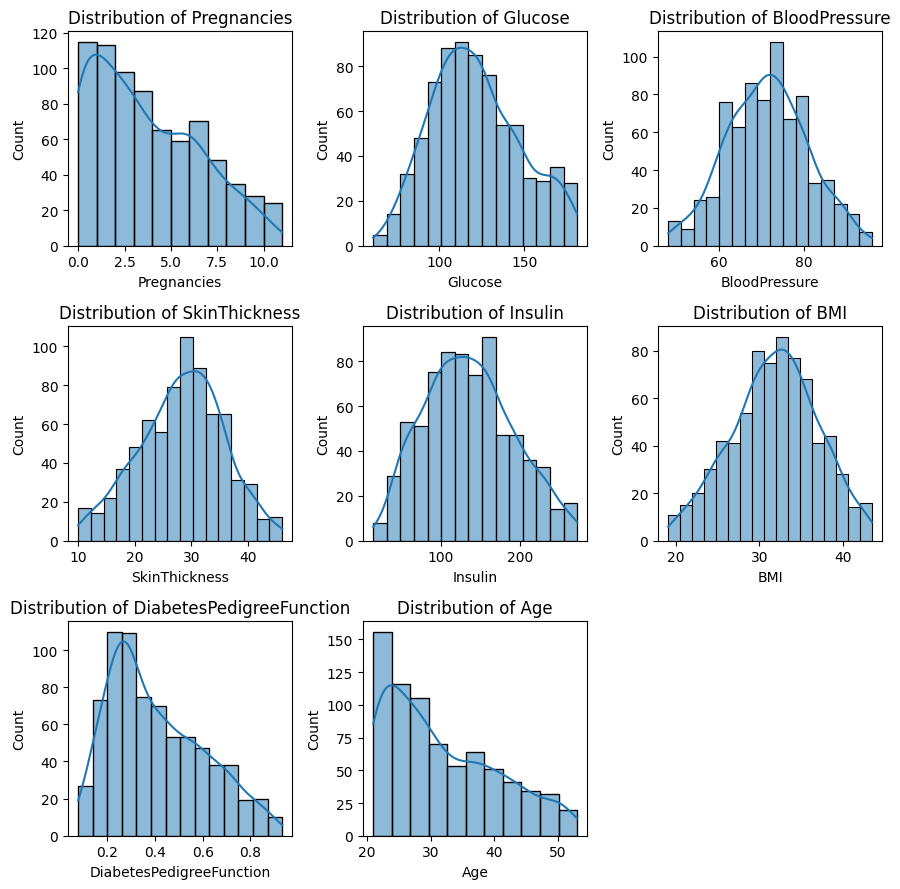

In [18]:
# Univariate Analysis

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
axes = axes.flatten()

for i, col in enumerate(df_balanced.drop('Outcome', axis=1).columns):
    sns.histplot(df_balanced[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')

for i in range(len(df_balanced.drop('Outcome', axis=1).columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


### 1.5 Exploratory Data Analysis - Multivariate Analysis

#### 1.5.1 Pairplot

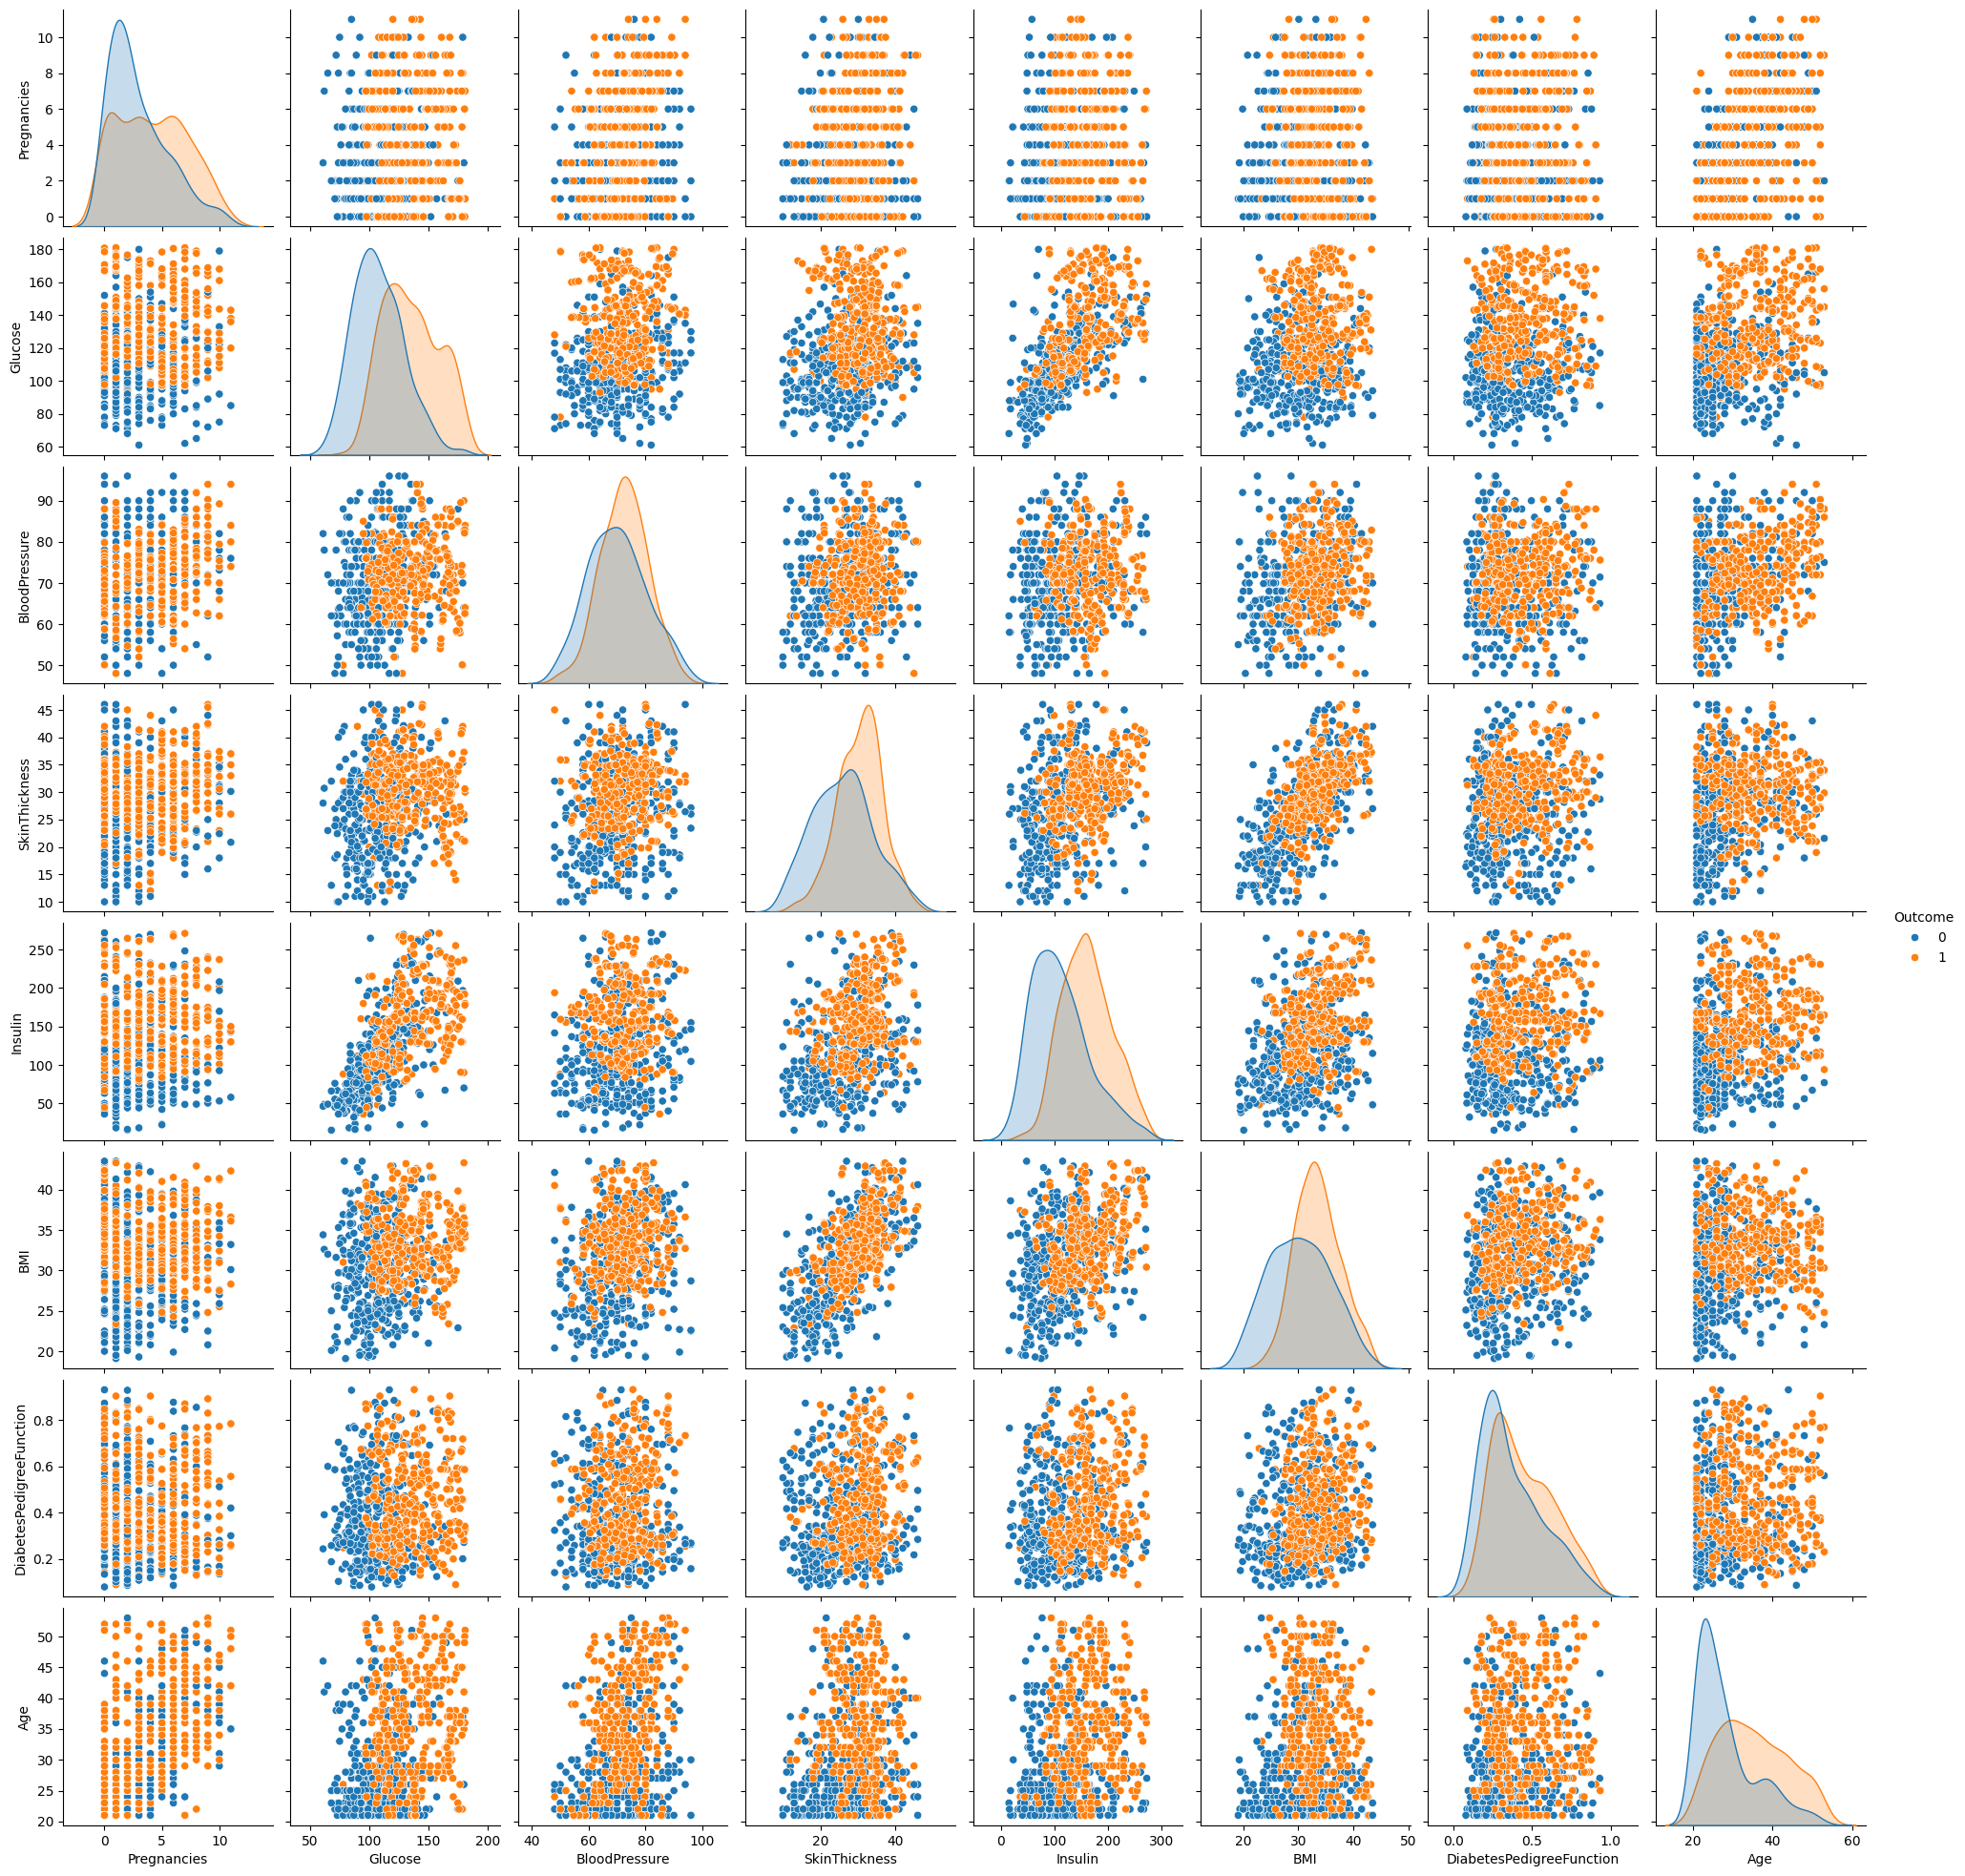

In [19]:
# Pairplot
sns.pairplot(df_balanced, hue='Outcome', diag_kind='kde')
plt.show()

#### 1.5.2 Correlation Matrix

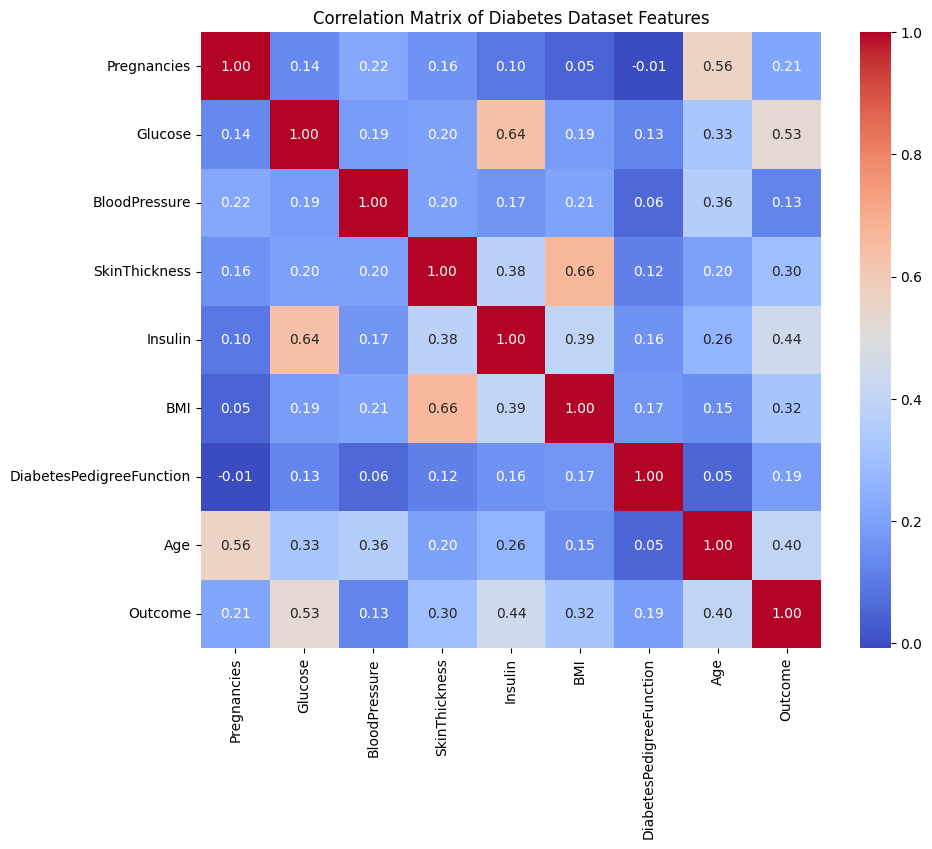

In [20]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df_balanced.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Diabetes Dataset Features')
plt.show()

## 2. Data Preparation

#### 2.1 Pisahkan X dan Y

Fitur (X) dan target (y) akan dipisahkan

In [21]:
# Pisahkan fitur (X) dan target (y)
X = df_balanced.drop('Outcome', axis=1)
y = df_balanced['Outcome']

#### 2.2 Inisialisasi PCA

Principal Component Analysis (PCA) digunakan untuk mereduksi dimensi fitur.

In [22]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan jumlah komponen yang diinginkan
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)

# Cetak varians yang dijelaskan oleh setiap komponen
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)
print("Total explained variance:", sum(explained_variance_ratio))

Explained variance ratio: [0.85112176 0.0921329  0.02655269 0.01322015 0.01282907 0.00283316]
Total explained variance: 0.9986897325780326


#### 2.3 Split Data

Data akan dibagi menjadi set training dan testing menggunakan train_test_split dengan proporsi 80:20.

In [23]:
# Split data menjadi training dan testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

#### 2.4 Standarisasi Data

Data akan distandarisasi menggunakan StandardScaler agar memiliki distribusi yang seimbang.

In [24]:
# Inisialisasi StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
X_test_scaled = scaler.transform(X_test_pca)

## 3. Model Development

### 3.1 Inisiasi Model

Model yang digunakan meliputi:

- Logistic Regression

- Decision Tree

- Random Forest

- Gradient Boosting

- Support Vector Machine (SVM)

- K-Nearest Neighbors (KNN)

- Naive Bayes

In [25]:
# Model Development
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42, probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

### 3.2 Train Model

In [26]:
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": report['macro avg']['precision'],
        "Recall": report['macro avg']['recall'],
        "F1-Score": report['macro avg']['f1-score'],
        "AUC": roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1])
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic Regression,0.751678,0.756793,0.758009,0.751633,0.838369
1,Decision Tree,0.758389,0.764797,0.765471,0.758378,0.765471
2,Random Forest,0.838926,0.839279,0.842738,0.838570,0.914816
3,Gradient Boosting,0.832215,0.831892,0.835275,0.831730,0.887514
4,Support Vector Machine,0.805369,0.816941,0.814980,0.805334,0.880961
5,K-Nearest Neighbors,0.738255,0.782213,0.756735,0.735202,0.878322
6,Naive Bayes,0.805369,0.805045,0.808154,0.804806,0.866400


## 4. Model Evaluation

In [27]:
# Mencari model terbaik berdasarkan metrik yang dipilih (misalnya, akurasi, skor F1, AUC)
best_model_index = results_df['Accuracy'].idxmax()
best_model_name = results_df.loc[best_model_index, 'Model']
best_model_accuracy = results_df.loc[best_model_index, 'Accuracy']
best_model_f1 = results_df.loc[best_model_index, 'F1-Score']
best_model_auc = results_df.loc[best_model_index, 'AUC']


print(f"The best model is {best_model_name} with an accuracy of {best_model_accuracy:.4f}")
print(f"F1 Score: {best_model_f1:.4f}")
print(f"AUC: {best_model_auc:.4f}")

The best model is Random Forest with an accuracy of 0.8389
F1 Score: 0.8386
AUC: 0.9148


              precision    recall  f1-score   support

           0       0.89      0.80      0.85        82
           1       0.79      0.88      0.83        67

    accuracy                           0.84       149
   macro avg       0.84      0.84      0.84       149
weighted avg       0.84      0.84      0.84       149



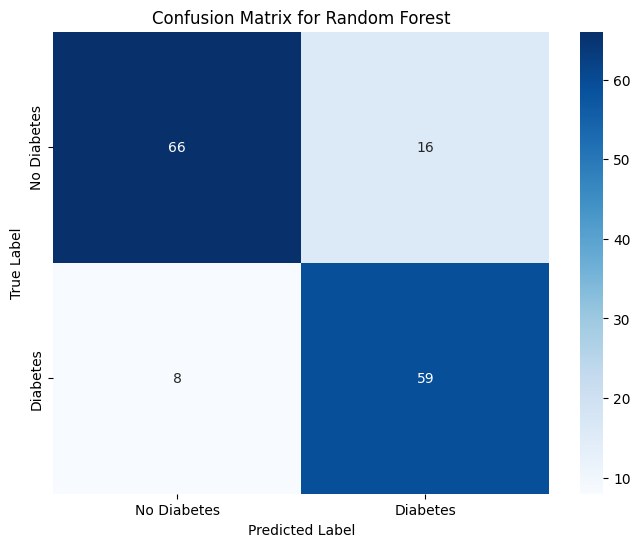

In [28]:
# Memilih Model Terbaik
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_scaled)

# Generate classification report
print(classification_report(y_test, y_pred_best))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Confusion Matrix for {}".format(best_model_name))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [29]:
# Save the best model
joblib.dump(best_model, 'best_diabetes_model.joblib')
print(f"Model terbaik ({best_model_name}) telah disimpan ke 'best_diabetes_model.joblib'")

# Save the scaler
joblib.dump(scaler, 'scaler.joblib')
print("Scaler telah disimpan ke 'scaler.joblib'")

# Save PCA
joblib.dump(pca, 'pca.joblib')
print("PCA telah disimpan ke 'pca.joblib'")

Model terbaik (Random Forest) telah disimpan ke 'best_diabetes_model.joblib'
Scaler telah disimpan ke 'scaler.joblib'
PCA telah disimpan ke 'pca.joblib'
